In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "lazio"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,12,Lazio,1,1,2,0,2,0,0,...,0.0,0.0,0.0,0.0,50.00,100.00,0.00,0.00,0.00,0.000
1,2020-02-26T18:00:00,12,Lazio,0,0,0,0,0,-2,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-100.00,0.000
2,2020-02-27T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,428.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
3,2020-02-28T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,59.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
4,2020-02-29T17:00:00,12,Lazio,3,0,3,0,3,3,3,...,0.0,68.0,0.0,0.0,0.00,100.00,4.41,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2020-11-12T17:00:00,12,Lazio,2953,259,3212,56707,59919,2336,2686,...,49.0,29119.0,21816.0,2292.0,8.06,5.36,9.22,12.31,1.57,4.665
262,2020-11-13T17:00:00,12,Lazio,3018,260,3278,59121,62399,2480,2925,...,34.0,28309.0,21816.0,2414.0,7.93,5.25,10.33,13.41,0.39,4.882
263,2020-11-14T17:00:00,12,Lazio,3076,273,3349,61609,64958,2559,2997,...,39.0,29822.0,24696.0,2488.0,8.15,5.16,10.05,12.14,5.00,4.803
264,2020-11-15T17:00:00,12,Lazio,3159,274,3433,63876,67309,2351,2612,...,21.0,22434.0,18750.0,2267.0,7.98,5.10,11.64,13.93,0.37,4.021


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 16, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2407
Nuovi tamponi: 19699.0
Percentuale nuovi positivi/nuovi tamponi: 12.2 %
Nuovi guariti: 412.0
Nuovi deceduti: 34.0
Variazione positivi ricoverati con sintomi: -60.0
Variazione positivi in terapia intensiva: 4.0
Variazione positivi in isolamento dimiciliare: 2017.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 16, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-17T17:00:00,12,Lazio,492,16,508,4775,5283,155,181,...,2.0,9381.0,8002.0,132.0,3.15,9.62,1.93,2.26,-11.11,3.530
1,2020-09-18T17:00:00,12,Lazio,459,17,476,4937,5413,130,193,...,0.0,10558.0,8793.0,162.0,3.57,8.79,1.83,2.19,6.25,3.653
2,2020-09-19T17:00:00,12,Lazio,445,22,467,5071,5538,125,197,...,1.0,10097.0,8609.0,134.0,4.71,8.43,1.95,2.29,29.41,3.639
3,2020-09-20T17:00:00,12,Lazio,422,23,445,5244,5689,151,165,...,0.0,9464.0,8844.0,173.0,5.17,7.82,1.74,1.87,4.55,2.979
4,2020-09-21T17:00:00,12,Lazio,466,27,493,5347,5840,151,198,...,5.0,8286.0,7446.0,103.0,5.48,8.44,2.39,2.66,17.39,3.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-12T17:00:00,12,Lazio,2953,259,3212,56707,59919,2336,2686,...,49.0,29119.0,21816.0,2292.0,8.06,5.36,9.22,12.31,1.57,4.665
57,2020-11-13T17:00:00,12,Lazio,3018,260,3278,59121,62399,2480,2925,...,34.0,28309.0,21816.0,2414.0,7.93,5.25,10.33,13.41,0.39,4.882
58,2020-11-14T17:00:00,12,Lazio,3076,273,3349,61609,64958,2559,2997,...,39.0,29822.0,24696.0,2488.0,8.15,5.16,10.05,12.14,5.00,4.803
59,2020-11-15T17:00:00,12,Lazio,3159,274,3433,63876,67309,2351,2612,...,21.0,22434.0,18750.0,2267.0,7.98,5.10,11.64,13.93,0.37,4.021


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

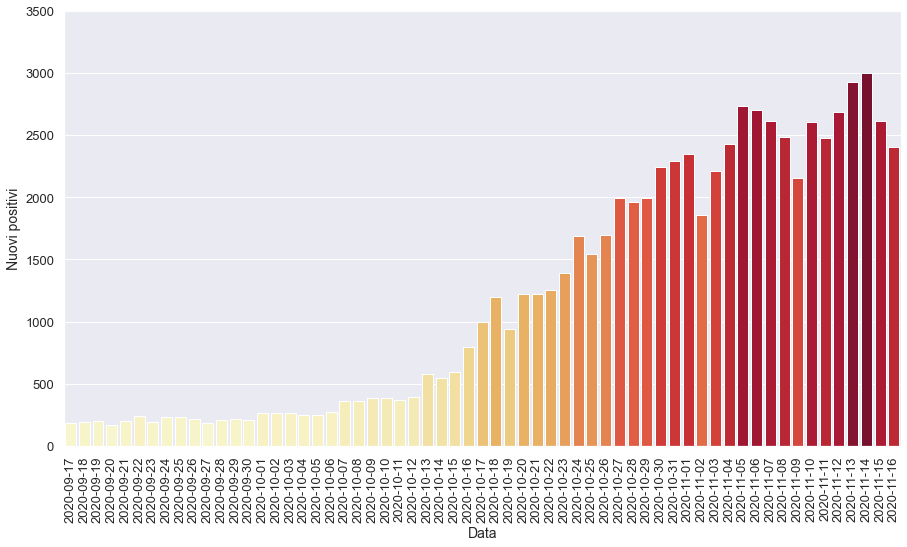

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

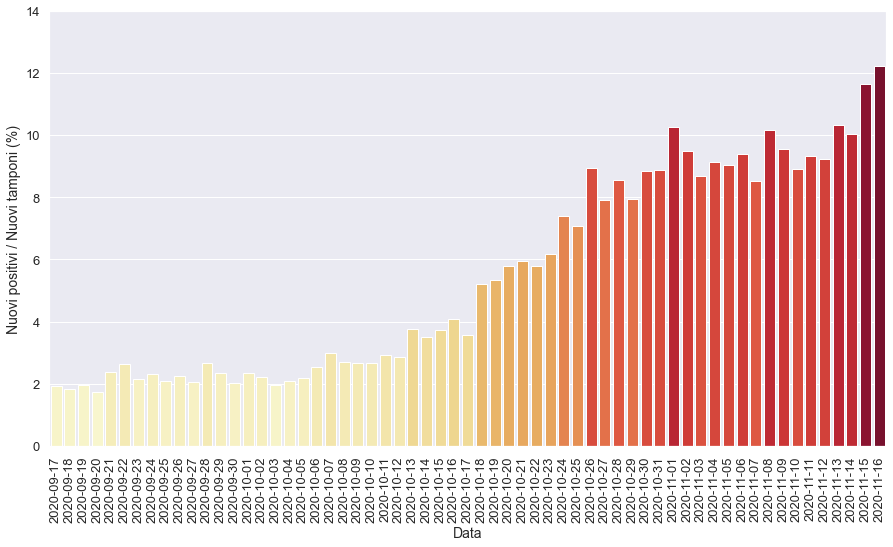

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

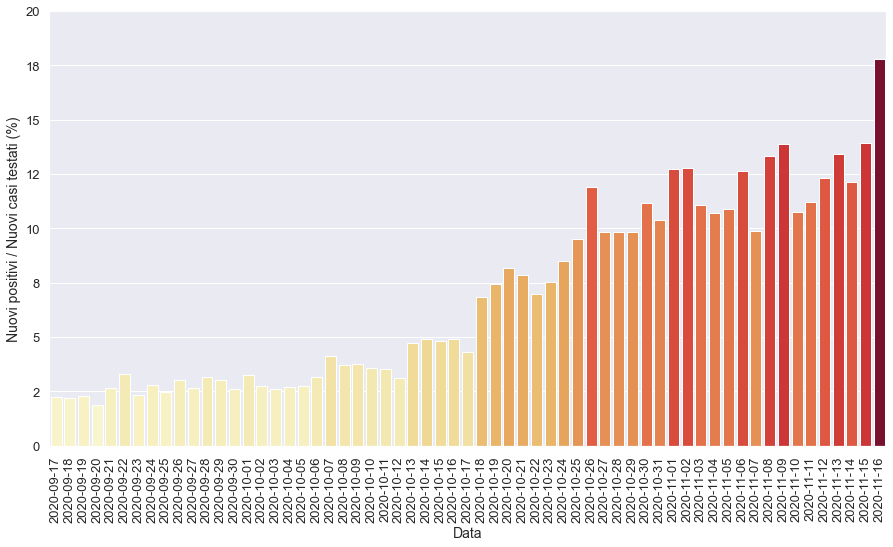

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

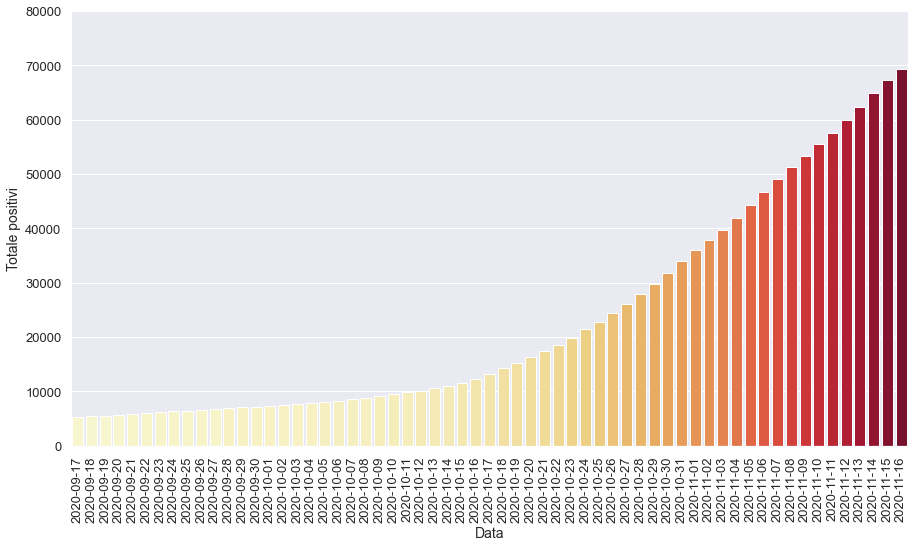

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

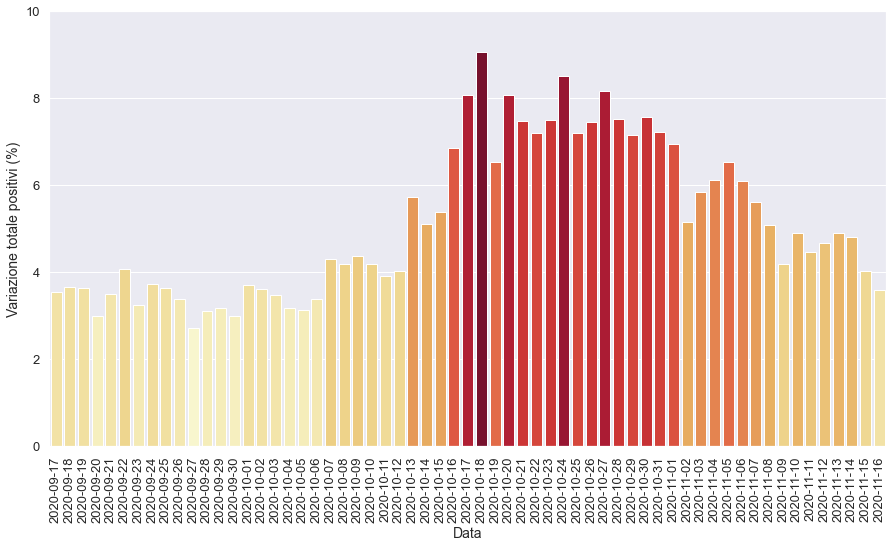

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

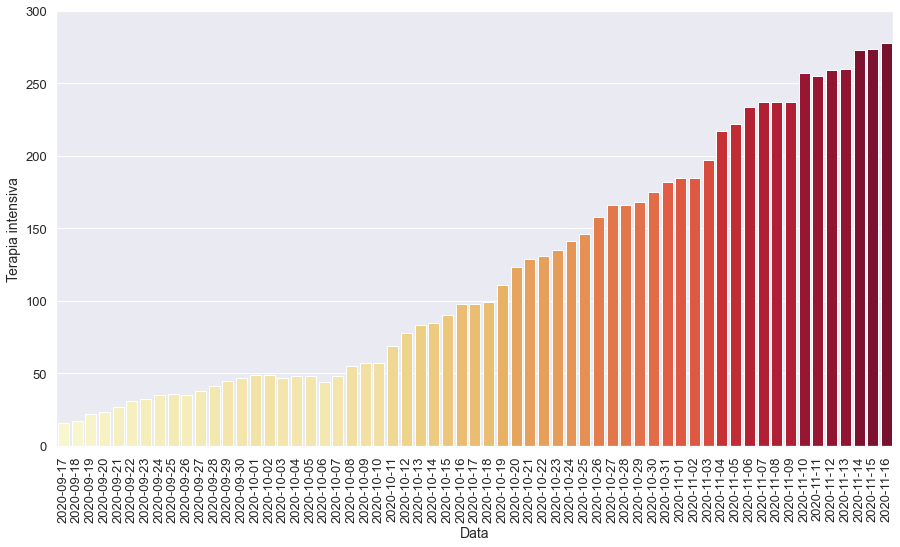

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

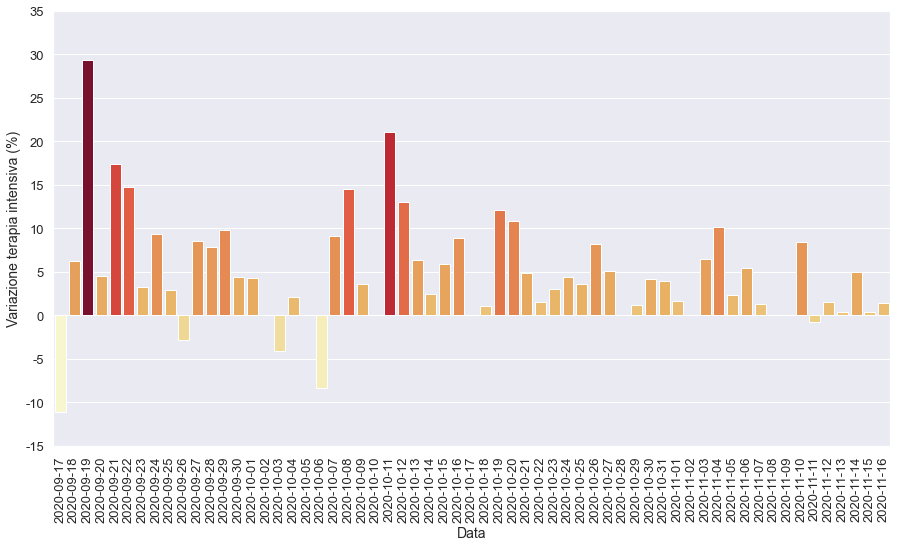

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

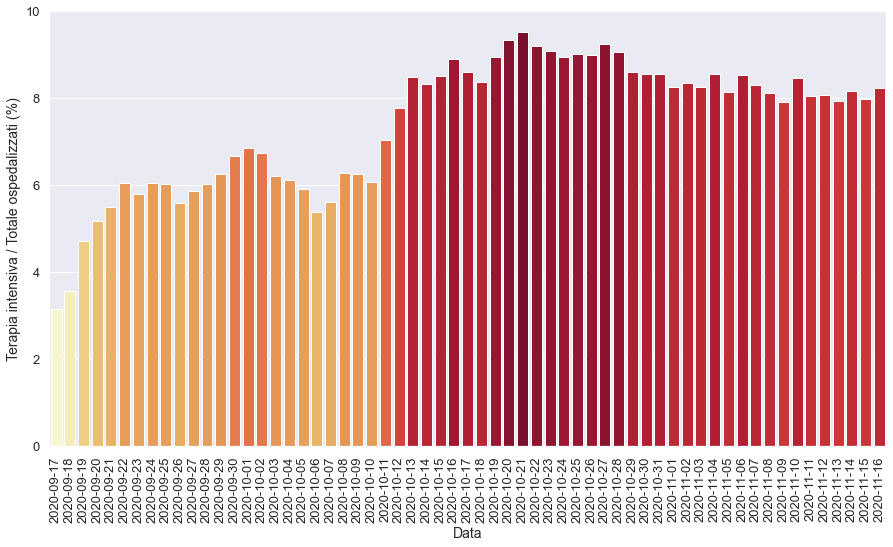

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

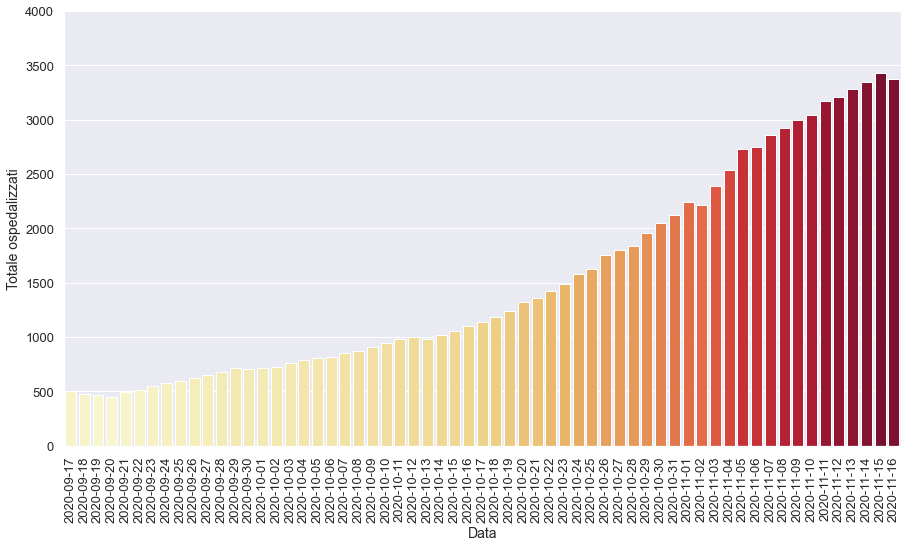

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

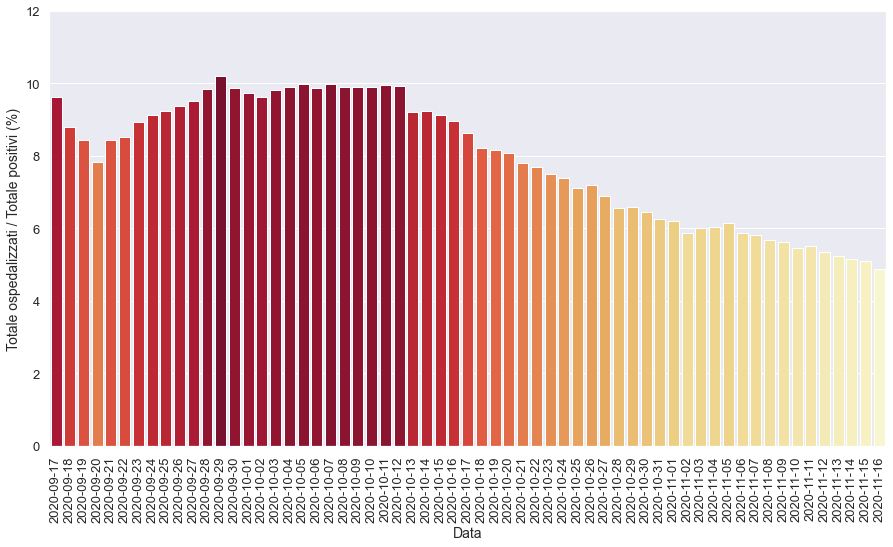

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

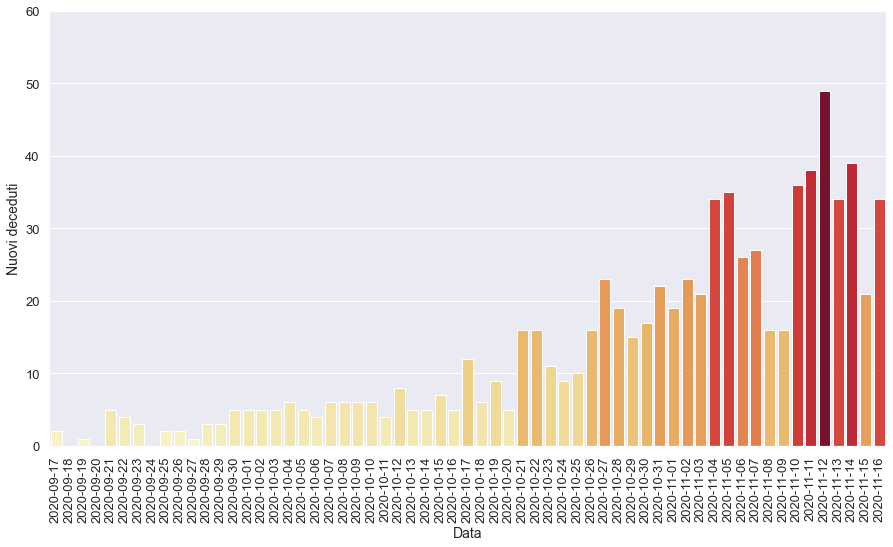

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

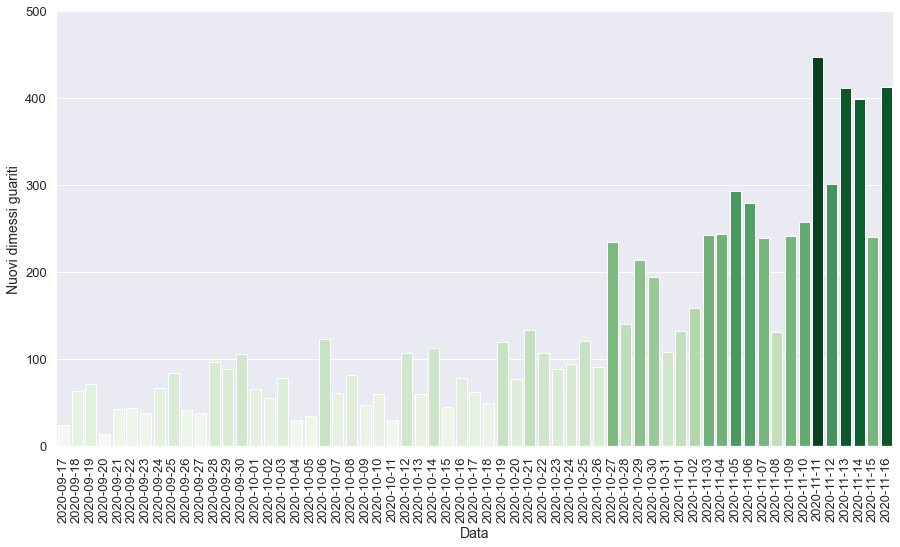

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-17T17:00:00,12,Lazio,1043,98,1141,12096,13237,920,994,...,12.0,27748.0,23129.0,881.0,8.59,8.62,3.58,4.30,0.00,8.070
1,2020-10-18T17:00:00,12,Lazio,1085,99,1184,13196,14380,1143,1198,...,6.0,23010.0,17461.0,1100.0,8.36,8.23,5.21,6.86,1.02,9.050
2,2020-10-19T17:00:00,12,Lazio,1130,111,1241,13950,15191,811,939,...,9.0,17573.0,12645.0,754.0,8.94,8.17,5.34,7.43,12.12,6.530
3,2020-10-20T17:00:00,12,Lazio,1196,123,1319,15014,16333,1142,1224,...,5.0,21117.0,14954.0,1064.0,9.33,8.08,5.80,8.19,10.81,8.057
4,2020-10-21T17:00:00,12,Lazio,1226,129,1355,16048,17403,1070,1219,...,16.0,20505.0,15553.0,1034.0,9.52,7.79,5.94,7.84,4.88,7.463
5,2020-10-22T17:00:00,12,Lazio,1293,131,1424,17107,18531,1128,1251,...,16.0,21575.0,17940.0,1059.0,9.20,7.68,5.80,6.97,1.55,7.188
6,2020-10-23T17:00:00,12,Lazio,1354,135,1489,18332,19821,1290,1389,...,11.0,22457.0,18457.0,1225.0,9.07,7.51,6.19,7.53,3.05,7.496
7,2020-10-24T17:00:00,12,Lazio,1438,141,1579,19826,21405,1584,1687,...,9.0,22779.0,19800.0,1494.0,8.93,7.38,7.41,8.52,4.44,8.511
8,2020-10-25T17:00:00,12,Lazio,1476,146,1622,21193,22815,1410,1541,...,10.0,21832.0,16170.0,1367.0,9.00,7.11,7.06,9.53,3.55,7.199
9,2020-10-26T17:00:00,12,Lazio,1599,158,1757,22649,24406,1591,1698,...,16.0,18991.0,14288.0,1456.0,8.99,7.20,8.94,11.88,8.22,7.442


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

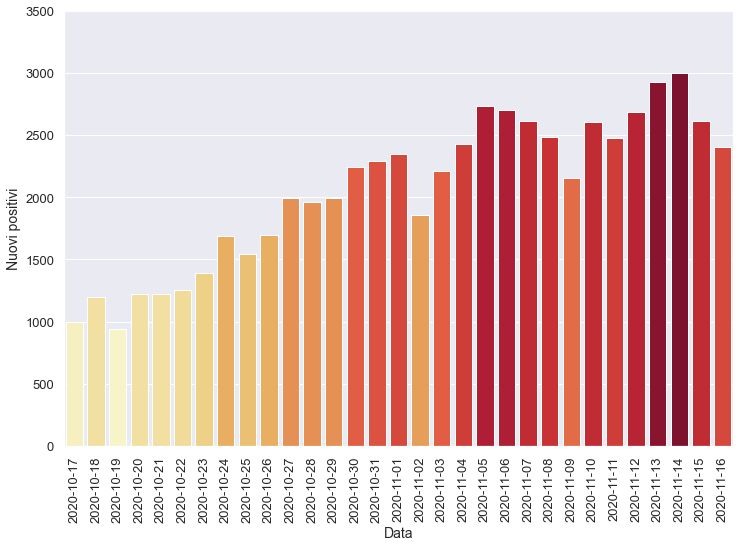

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

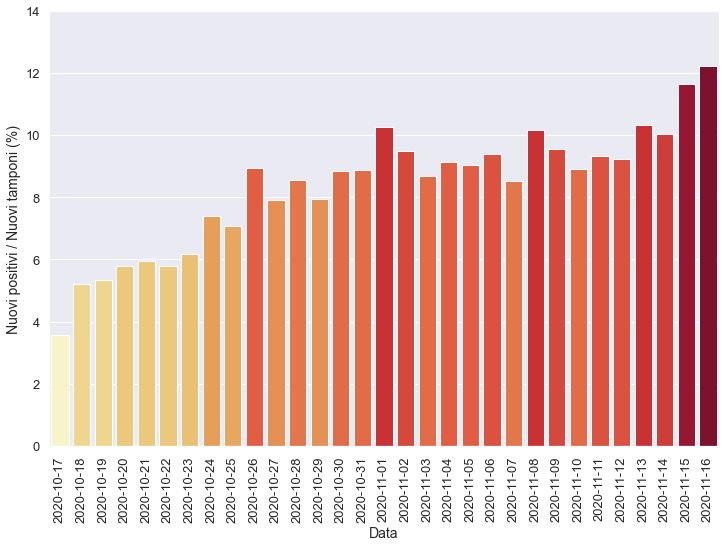

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

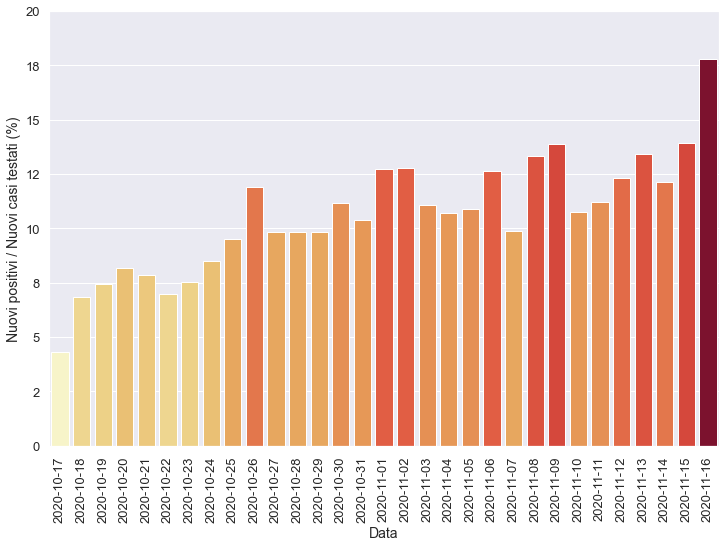

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

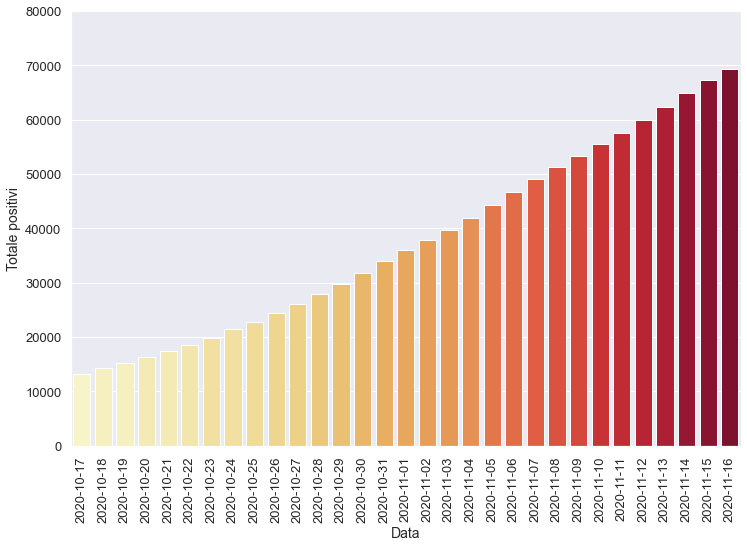

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

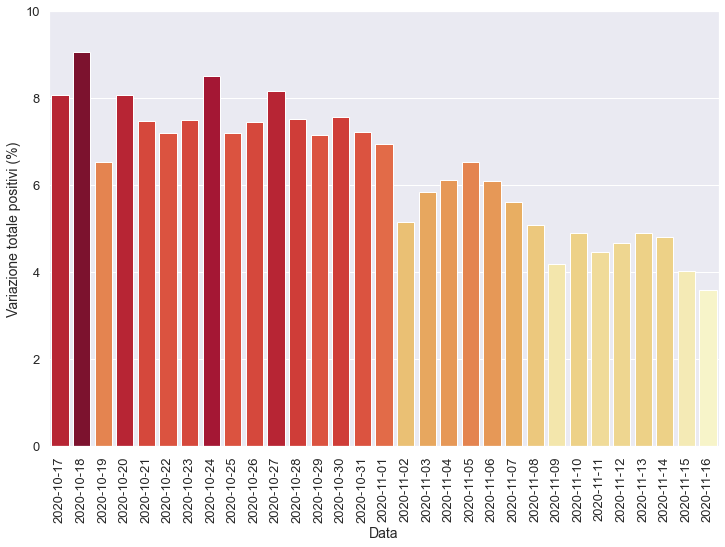

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

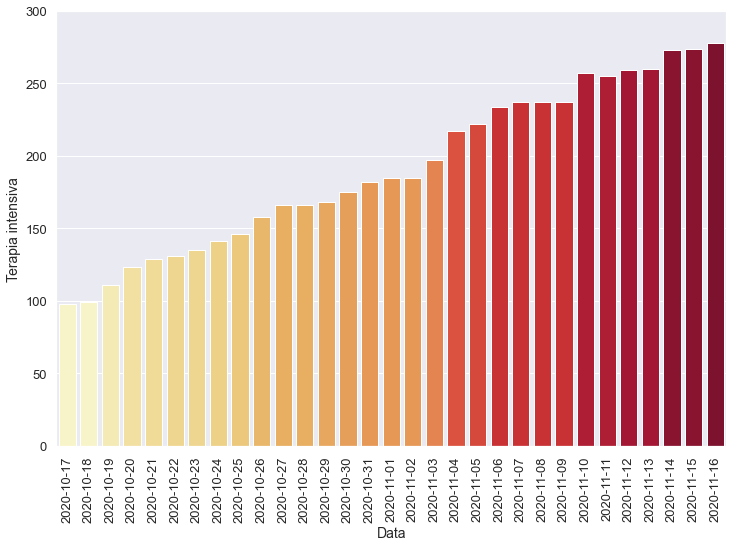

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

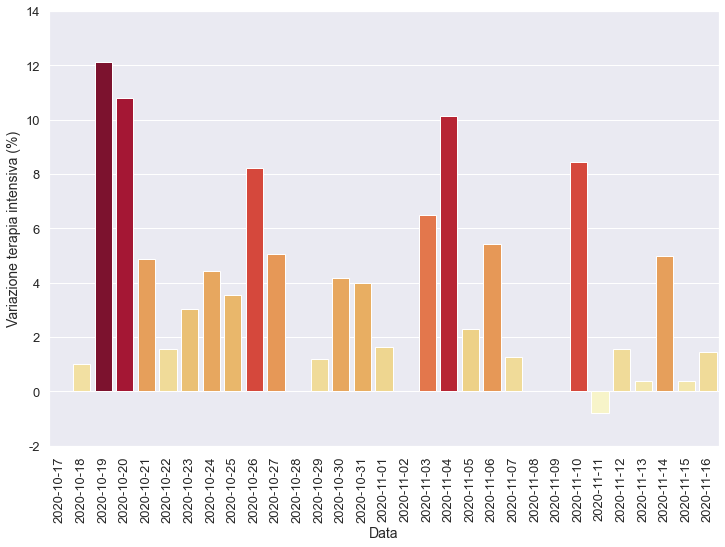

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

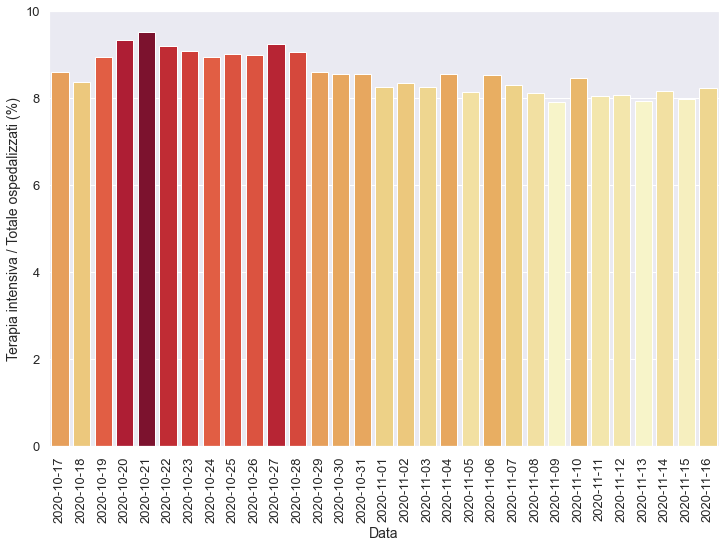

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

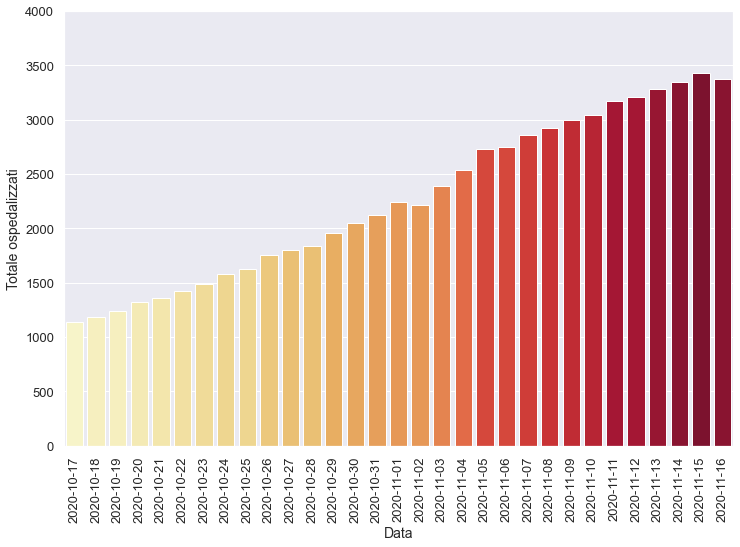

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

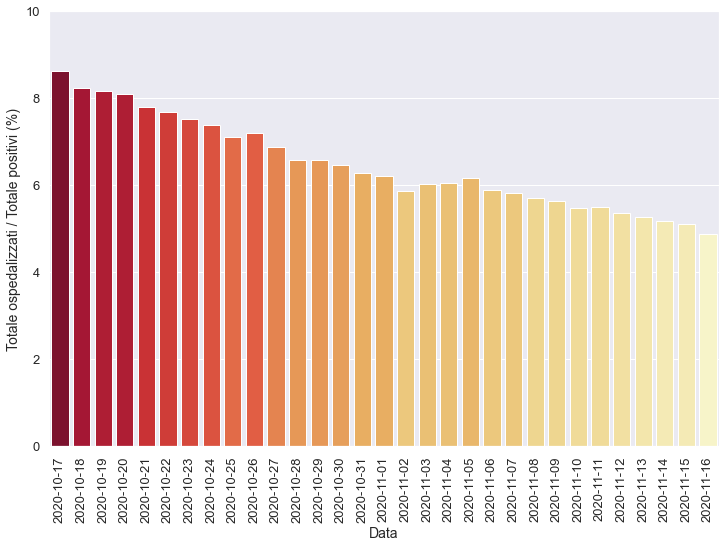

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

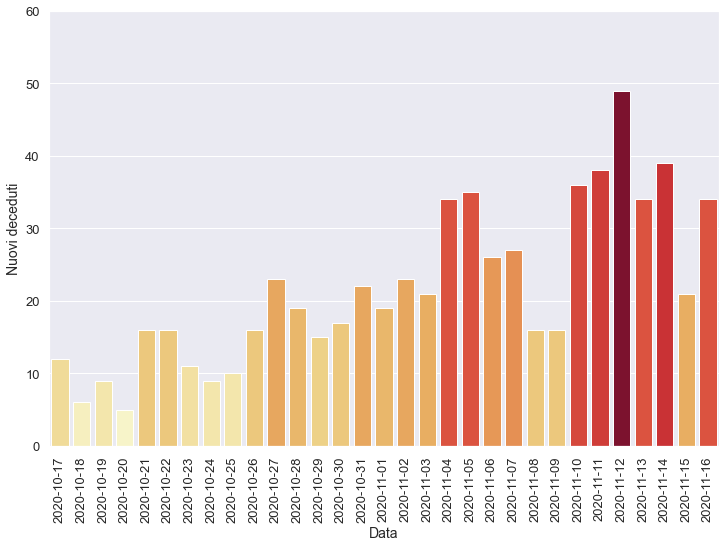

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

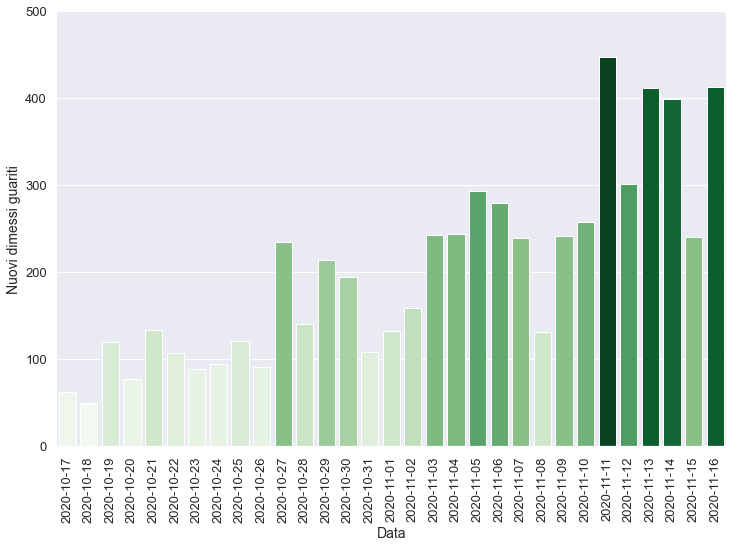

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-09T17:00:00,12,Lazio,2761,237,2998,50276,53274,1896,2153,...,16.0,22518.0,15518.0,1821.0,7.91,5.63,9.56,13.87,0.00,4.191
1,2020-11-10T17:00:00,12,Lazio,2785,257,3042,52547,55589,2315,2608,...,36.0,29315.0,24224.0,2271.0,8.45,5.47,8.90,10.77,8.44,4.895
2,2020-11-11T17:00:00,12,Lazio,2913,255,3168,54415,57583,1994,2479,...,38.0,26554.0,22127.0,1868.0,8.05,5.50,9.34,11.20,-0.78,4.460
3,2020-11-12T17:00:00,12,Lazio,2953,259,3212,56707,59919,2336,2686,...,49.0,29119.0,21816.0,2292.0,8.06,5.36,9.22,12.31,1.57,4.665
4,2020-11-13T17:00:00,12,Lazio,3018,260,3278,59121,62399,2480,2925,...,34.0,28309.0,21816.0,2414.0,7.93,5.25,10.33,13.41,0.39,4.882
5,2020-11-14T17:00:00,12,Lazio,3076,273,3349,61609,64958,2559,2997,...,39.0,29822.0,24696.0,2488.0,8.15,5.16,10.05,12.14,5.00,4.803
6,2020-11-15T17:00:00,12,Lazio,3159,274,3433,63876,67309,2351,2612,...,21.0,22434.0,18750.0,2267.0,7.98,5.10,11.64,13.93,0.37,4.021
7,2020-11-16T17:00:00,12,Lazio,3099,278,3377,65893,69270,1961,2407,...,34.0,19699.0,13538.0,2017.0,8.23,4.88,12.22,17.78,1.46,3.576


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

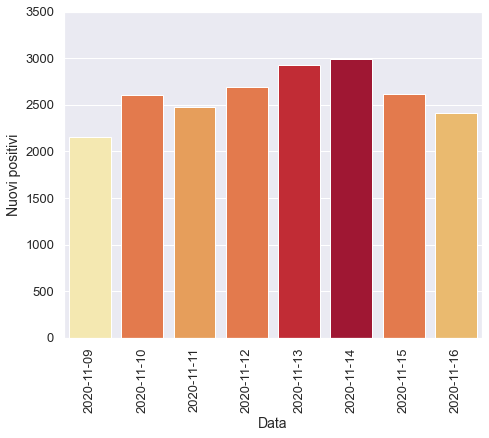

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

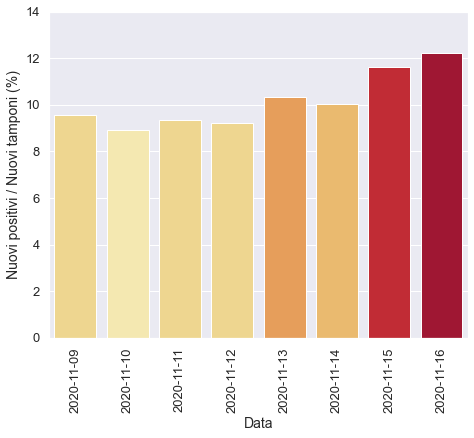

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

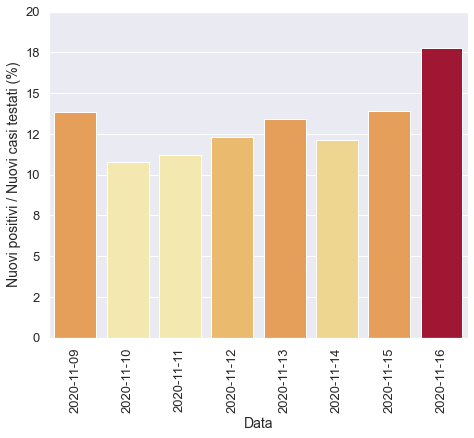

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

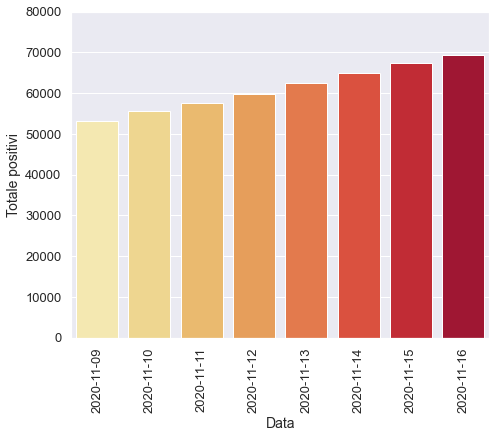

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

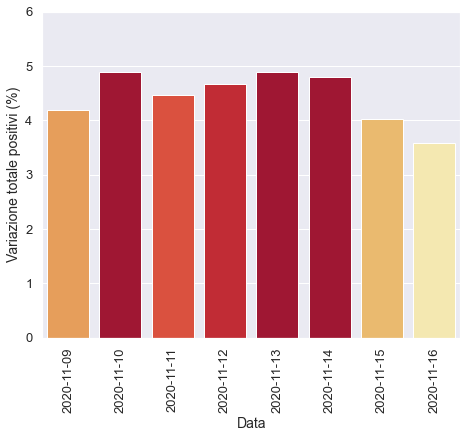

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

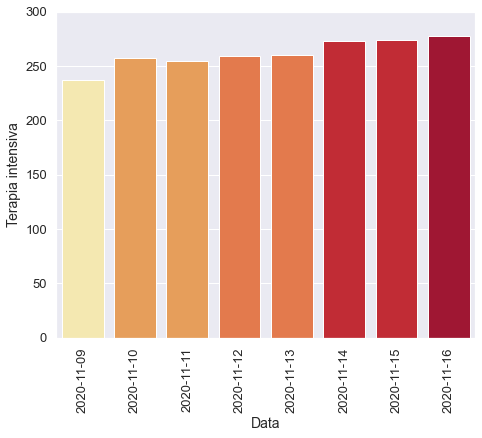

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

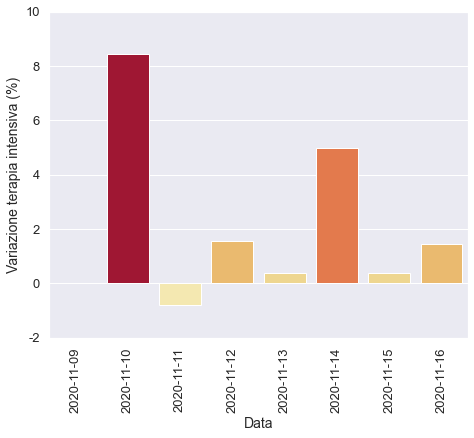

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

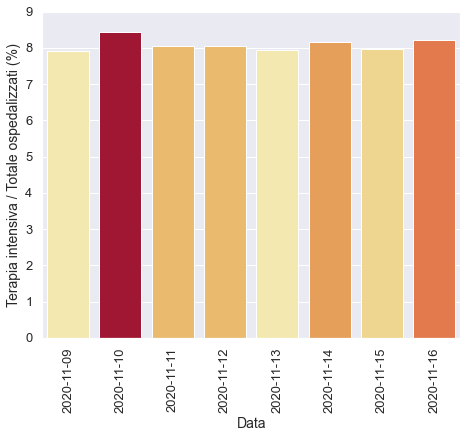

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

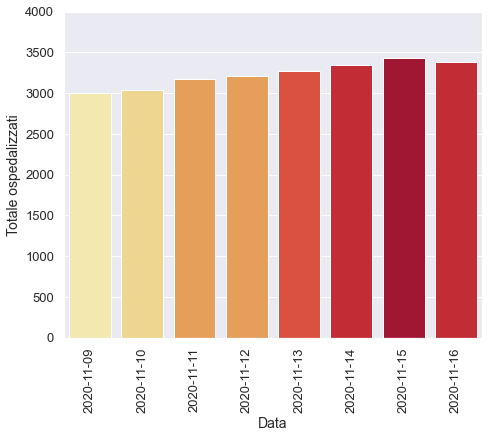

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

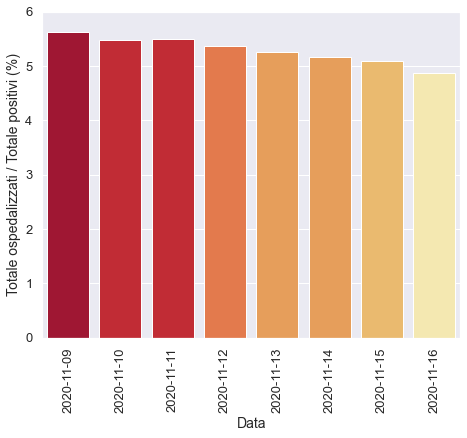

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

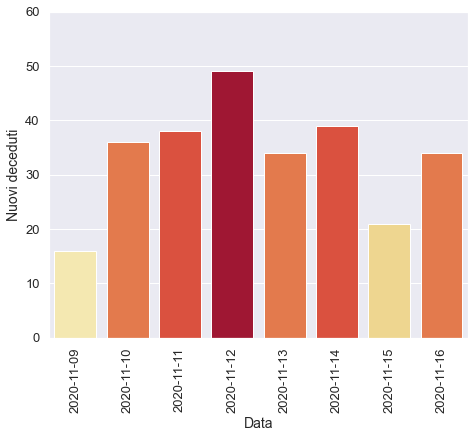

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

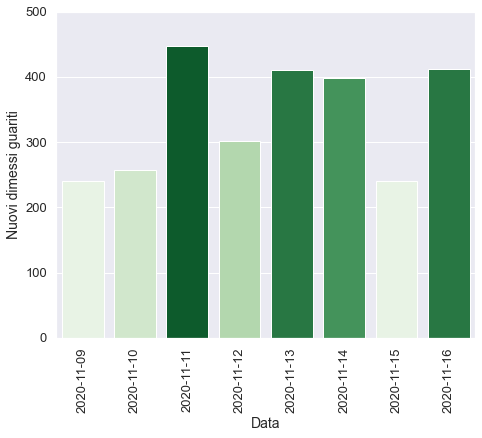

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)